In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **EXERCISE 1.**

Build and train a neural network that achieves 99.5 % classification accuracy for datapoints $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,2,3$, below.

{0.0, 1.0, 2.0, 3.0}


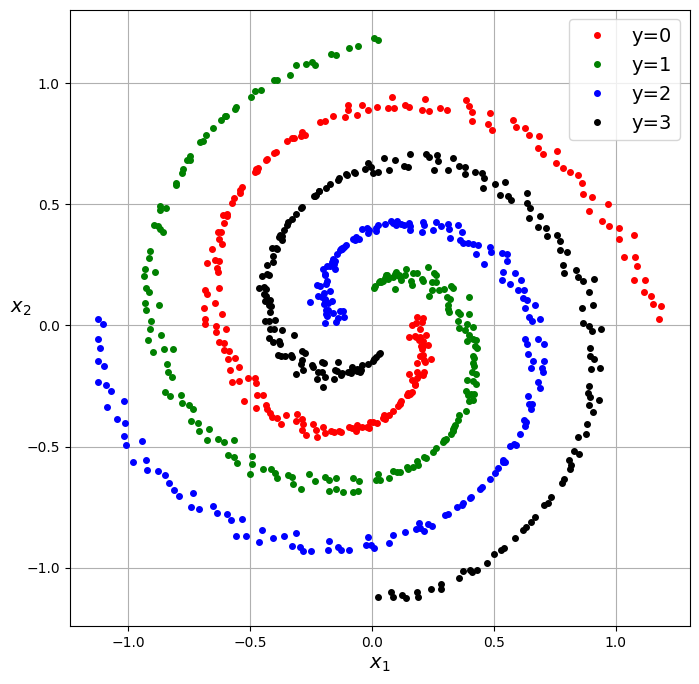

(800, 2)
(800,)


In [ ]:
np.random.seed(0)
n=200
m=4*n #number of datapoints
th=np.linspace(0,2*np.pi,n)
r=np.linspace(0.15,1.15,n)
e=np.random.normal(0,0.02,n)

#making the X's
x11=r*np.cos(-th)+e
x12=r*np.sin(-th)+e

x21=r*np.cos(np.pi/2-th)+e
x22=r*np.sin(np.pi/2-th)+e

x31=r*np.cos(np.pi-th)+e
x32=r*np.sin(np.pi-th)+e

x41=r*np.cos(3*np.pi/2-th)+e
x42=r*np.sin(3*np.pi/2-th)+e

x1=np.hstack((x11,x21,x31,x41))
x2=np.hstack((x12,x22,x32,x42))
X=np.vstack((x1,x2)).T
#total X


#classes in 1D-array y
y1=np.zeros(n)
y2=np.ones(n)
y3=np.ones(n)*2
y4=np.ones(n)*3
#print(y4)
y=np.hstack((y1,y2,y3,y4))
print(set(y))  # print {0, 1, 2, 3}


plt.figure(figsize=(8,8))
plt.plot(x11,x12,'r.',markersize=8,label='y=0')
plt.plot(x21,x22,'g.',markersize=8,label='y=1')
plt.plot(x31,x32,'b.',markersize=8,label='y=2')
plt.plot(x41,x42,'k.',markersize=8,label='y=3')
plt.grid()
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.legend(fontsize=14)
plt.show()
print(X.shape)
print(y.shape)

In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dense


model=Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(16,activation='sigmoid'))
#model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (464.00 B)

 Trainable params: 116 (464.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import SGD


model.compile(optimizer=SGD(learning_rate=4.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
#train the network i.e minimize the cost
#datapoints as rows of 2D-matrix x and
#their classes 0/1 in 1D-array y

history=model.fit(X,y,batch_size=8,epochs=200)

#verbose=0, if you don't want to see the prints below during the training

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 1.6215
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7246 - loss: 1.1636
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.6130
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7739 - loss: 0.5817
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 0.3334
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.6757
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4557
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3600
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.7913
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7220 - loss: 0.7820
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 1.0485
Epoch 12/200
100/100 ━━━━━━━━━━━━━━━━━━━━

Calculate the confusion matrix

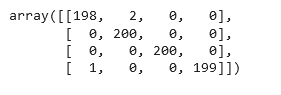

In [ ]:
from sklearn.metrics import confusion_matrix

ytest_pred=np.argmax(model.predict(X),axis=1)
print(confusion_matrix(y, ytest_pred))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[197   3   0   0]
 [  4 192   4   0]
 [  0   1 199   0]
 [  1   0   4 195]]


and draw a picture like below of the resulting classification

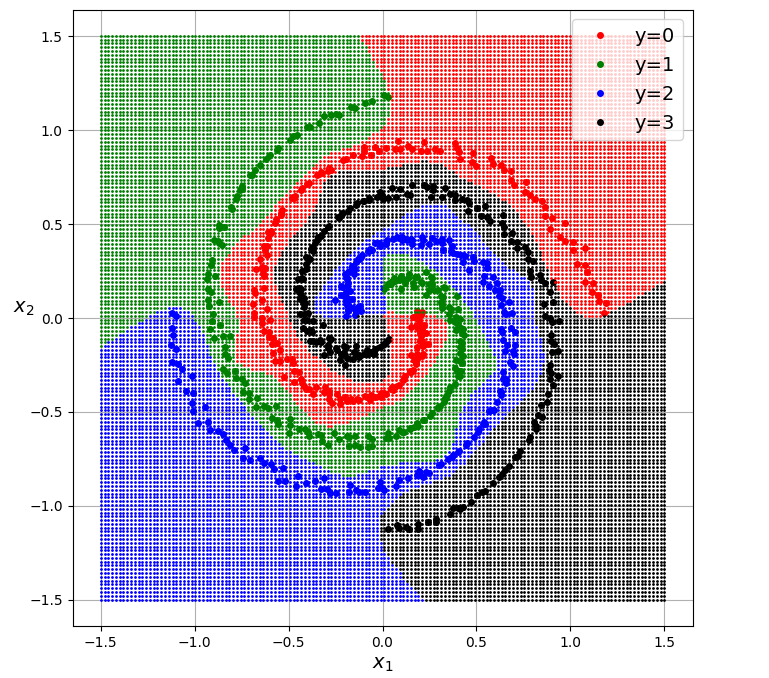

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


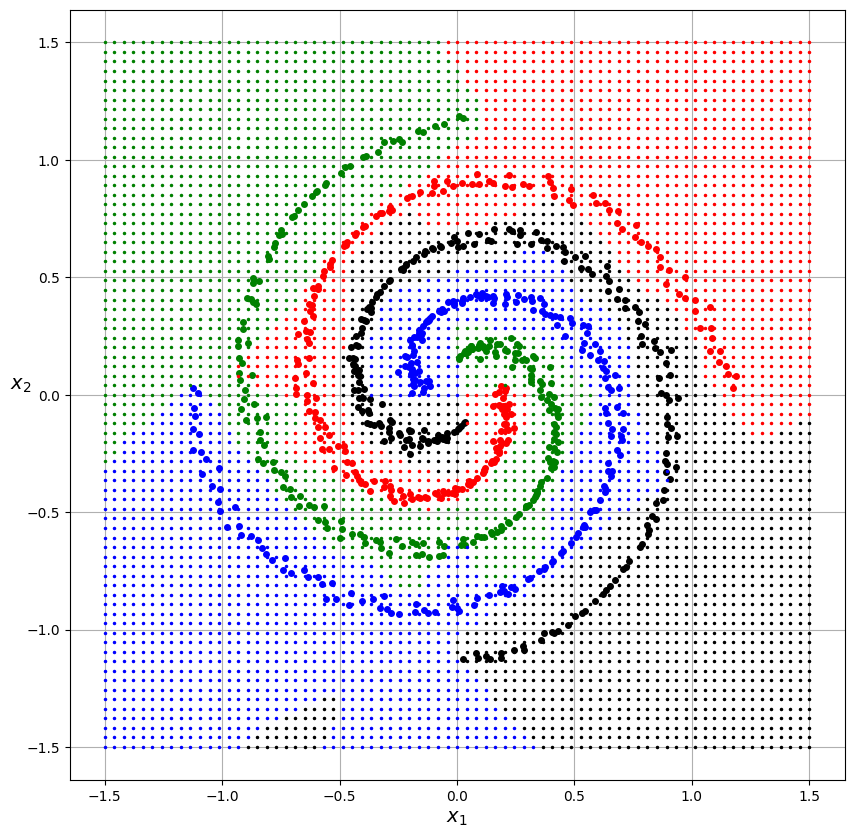

In [ ]:
#resulting classification
M=75
x1=np.linspace(-1.5,1.5,M)
x2=np.linspace(-1.5,1.5,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))

zz=model.predict(xx)
zz2=np.argmax(zz,axis=1)
ZZ2=zz2.reshape((M,M))

plt.figure(figsize=(10,10))
plt.plot(X[y==0,0],X[y==0,1],'ro',markersize=4,label='y=1')
plt.plot(X[y==1,0],X[y==1,1],'go',markersize=4,label='y=1')
plt.plot(X[y==2,0],X[y==2,1],'bo',markersize=4,label='y=2')
plt.plot(X[y==3,0],X[y==3,1],'ko',markersize=4,label='y=3')

plt.plot(x1[zz2==0,0],x2[zz2==0,0],'r.',markersize=3)
plt.plot(x1[zz2==1,0],x2[zz2==1,0],'g.',markersize=3)
plt.plot(x1[zz2==2,0],x2[zz2==2,0],'b.',markersize=3)
plt.plot(x1[zz2==3,0],x2[zz2==3,0],'k.',markersize=3)
plt.axis('equal')
plt.grid()
#plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

##**EXERCISE 2**

In [ ]:
#load apple_quality.csv to colab
df=pd.read_csv('/content/apple_quality.csv',index_col=0)
df.head() #first 5 rows

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


Goal: to predict Quality using the other 7 variables Size ... Acidity

#### Data Overview


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [ ]:
df.columns #column names

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [ ]:
df.index #row names

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999],
      dtype='int64', name='A_id', length=4000)

In [ ]:
df.shape
print(df['Size'])

A_id
0      -3.970049
1      -1.195217
2      -0.292024
3      -0.657196
4       1.364217
          ...   
3995    0.059386
3996   -0.293118
3997   -2.634515
3998   -4.008004
3999    0.278540
Name: Size, Length: 4000, dtype: float64


### Training

Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

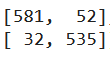

Classify the apple
xt=[ 1.34470668, -0.08934453, -4.50875321,  0.59093255, -3.98352604,
        1.50052136, -0.28032534]

(ans. bad)        

In [ ]:
X = np.column_stack((
    df['Size'],
    df['Weight'],
    df['Sweetness'],
    df['Crunchiness'],
    df['Juiciness'],
    df['Ripeness'],
    df['Acidity']
))
y = np.array(df['Quality'])
y = np.where(y == 'good', 1, 0)
print(y)
print(y.shape)
print(X.shape)

[1 1 0 ... 0 1 1]
(4000,)
(4000, 7)


In [ ]:
m,n=df.shape
print(m)
print(n)

4000
8


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [ ]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(2800, 7)
(2800,)
(1200, 7)
(1200,)


In [ ]:
mu=np.mean(Xtrain,axis=0)
s=np.std(Xtrain,axis=0)
print(mu)
print(s)
Xtrain_hat = (Xtrain - mu) / s  # Normalize training data
Xtest_hat = (Xtest - mu) / s    # Normalize test data using train stats

[-0.52766844 -1.00342381 -0.47471164  0.99028935  0.52669056  0.47338865
  0.04040455]
[1.91812239 1.58701228 1.9400383  1.40791952 1.92857762 1.8624451
 2.09029554]


In [ ]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense

model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(Xtrain_hat,ytrain,
                  epochs=100,
                  batch_size=128,
                  validation_data=(Xtest_hat,ytest)
                  )
#first 300 epochs with learning rate 0.1, then 200 epochs with learning rate 0.01, then 100 epochs with learning arte 0.001

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.5677 - loss: 0.6849 - val_accuracy: 0.7517 - val_loss: 0.6085
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7357 - loss: 0.5927 - val_accuracy: 0.7783 - val_loss: 0.5232
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7539 - loss: 0.5291 - val_accuracy: 0.8025 - val_loss: 0.4548
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7748 - loss: 0.4715 - val_accuracy: 0.8192 - val_loss: 0.4109
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8046 - loss: 0.4292 - val_accuracy: 0.8325 - val_loss: 0.3807
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8224 - loss: 0.3876 - val_accuracy: 0.8458 - val_loss: 0.3541
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8429 - loss: 0.3625 - val_accuracy: 0.8600 - val_loss: 0.3340
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8541 - loss: 0.3401 - val_accuracy: 0.85

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#save the model
model.save('/content/drive/MyDrive/apple_quality.keras')

In [ ]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/apple_quality.keras')
model.summary()
model.evaluate(Xtest_hat,ytest)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9223 - loss: 0.1884


[0.19989874958992004, 0.9191666841506958]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

ypred = (model.predict(Xtest_hat) > 0.5).astype(int) #return 0 or 1 value for y
cm = confusion_matrix(ytest, ypred)
print(cm)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[542  56]
 [ 41 561]]


In [ ]:
xt=np.array([[ 1.34470668, -0.08934453, -4.50875321, 0.59093255, -3.98352604, 1.50052136, -0.28032534]])

#scaling
xthat=(xt-mu)/s
ytpred=model.predict(xthat) #class 0/1
print(ytpred)
if ytpred<0.5:
  print('bad')
else:
  print('good')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.2379353]]
bad


## **EXERCISE 3**

In [ ]:
#load Dry_Bean_Dataset.csv to colab
df=pd.read_csv('Dry_Bean_Dataset.csv')
df.shape

(13611, 17)

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
# Ensure column names are correct
X = np.column_stack((
    df['Area'],
    df['Perimeter'],
    df['MajorAxisLength'],
    df['MinorAxisLength'],
    df['AspectRation'],  # Check if the correct name is 'AspectRatio' in your dataset
    df['Eccentricity'],
    df['ConvexArea'],
    df['EquivDiameter'],
    df['Extent'],
    df['Solidity'],
    df['roundness'],
    df['Compactness'],
    df['ShapeFactor1'],
    df['ShapeFactor2'],
    df['ShapeFactor3'],
    df['ShapeFactor4']
))

# Convert class labels to numeric values
class_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA':5,
    'DERMASON': 6
}

# Apply mapping
y = df['Class'].map(class_mapping).values
y = np.where(np.isnan(y), 0, y)
y = y.astype(int)
# Print shapes and unique values
print(y.shape)   # Should match the number of rows in X
print(X.shape)   # Should be (rows, 16)
print(np.unique(y))  # Should show [0, 1, 2, 3, 4, 5]


(13611,)
(13611, 16)
[0 1 2 3 4 5 6]


Goal: to predict the class using the other variables.


Split datapoints to training and test (70%/30%), and build and train a neural network that achieves 93% classification accuracy for test data, and calculate the confusion matrix.

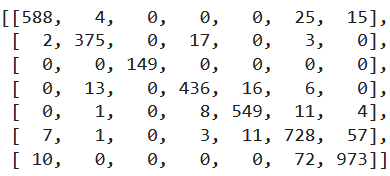

Classify the dry bean

xt=[29817        ,   654.94      ,   249.9393798 ,   153.5127658 ,
           1.62813417,     0.78915041, 30306        ,   194.8439979 ,
           0.76110374,     0.98386458,     0.87351583,     0.77956502,
           0.00838245,     0.00190968,     0.60772162,     0.98945234]

(ans. dermason)           

In [ ]:
m,n=df.shape
print(m)
print(n)

13611
17


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(np.any(np.isnan(Xtrain)), np.any(np.isinf(Xtrain)))
print(np.any(np.isnan(ytrain)), np.any(np.isinf(ytrain)))

(9527, 16)
(4084, 16)
(9527,)
(4084,)
False False
False False


In [ ]:
mu=np.mean(Xtrain,axis=0)
s=np.std(Xtrain,axis=0)
print(mu)
print(s)
Xtrain_hat = (Xtrain - mu) / s  # Normalize training data
Xtest_hat = (Xtest - mu) / s    # Normalize test data using train stats

[5.31441243e+04 8.55916192e+02 3.20316259e+02 2.02535765e+02
 1.58204706e+00 7.50427461e-01 5.38674131e+04 2.53297466e+02
 7.50022147e-01 9.87139762e-01 8.73491576e-01 8.00144596e-01
 6.55462271e-03 1.71596734e-03 6.44040992e-01 9.95053481e-01]
[2.93790786e+04 2.14251914e+02 8.56800200e+01 4.50484340e+01
 2.45894430e-01 9.24670891e-02 2.98405957e+04 5.92080580e+01
 4.90393666e-02 4.67166219e-03 5.90811475e-02 6.17221067e-02
 1.12383701e-03 5.95960846e-04 9.91166273e-02 4.39846236e-03]


In [ ]:
#from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense


model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,119 (195.78 KB)

 Trainable params: 50,119 (195.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(Xtrain_hat,ytrain,
                  epochs= 100,
                  batch_size=128,
                  validation_data=(Xtest_hat,ytest),
                  )

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5452 - loss: 1.2455 - val_accuracy: 0.9099 - val_loss: 0.2637
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8907 - loss: 0.3269 - val_accuracy: 0.9251 - val_loss: 0.2021
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9079 - loss: 0.2828 - val_accuracy: 0.9256 - val_loss: 0.2029
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9128 - loss: 0.2561 - val_accuracy: 0.9270 - val_loss: 0.1989
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9099 - loss: 0.2479 - val_accuracy: 0.9307 - val_loss: 0.1920
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9186 - loss: 0.2448 - val_accuracy: 0.9307 - val_loss: 0.1889
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9177 - loss: 0.2379 - val_accuracy: 0.9349 - val_loss: 0.1850
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9167 - loss: 0.2376 - val_accuracy: 0.9287 - 

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#save the model
model.save('/content/drive/MyDrive/DryBean_quality.keras')

In [ ]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/DryBean_quality.keras')
model.summary()
model.evaluate(Xtest_hat,ytest)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,359 (587.34 KB)

 Trainable params: 50,119 (195.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,240 (391.57 KB)

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9298 - loss: 0.2056


[0.18530511856079102, 0.9365817904472351]

In [ ]:
# Get model predictions (probabilities)
ypred_probs = model.predict(Xtest_hat)

# Convert probabilities to class labels (0-5)
ypred = np.argmax(ypred_probs, axis=1)  # Select the index with max probability

# Compute confusion matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 576    2    0    0    0   20   10]
 [   1  373    0   15    3    6    0]
 [   0    0  153    0    0    0    0]
 [   1    8    2  474    4    3    0]
 [   0    1    0   10  558   12    3]
 [   4    2    0    2   11  658   77]
 [   8    0    0    0    0   54 1033]]


In [ ]:
xt=np.array([[29817 , 654.94 , 249.9393798 , 153.5127658 , 1.62813417, 0.78915041, 30306 , 194.8439979 , 0.76110374, 0.98386458, 0.87351583, 0.77956502, 0.00838245, 0.00190968, 0.60772162, 0.98945234]])

#scaling
xthat=(xt-mu)/s
ytpred=model.predict(xthat)
ytpred_class = np.argmax(ytpred, axis=1)
print("Predicted class:", ytpred_class)

def get_bean_type(class_id):
    match class_id:
        case 0: return "SEKER"
        case 1: return "BARBUNYA"
        case 2: return "BOMBAY"
        case 3: return "CALI"
        case 4: return "HOROZ"
        case 5: return "SIRA"
        case 6: return "DERMASON"
        case _: return "Unknown"  # Default case for invalid inputs

print("Predicted bean type:", get_bean_type(ytpred_class))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted class: [6]
Predicted bean type: DERMASON


## **EXERCISE 4**

[Sign-language-mnist-dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

 28x28 bw-pictures of hand-gesture alphabets  A-Y (without J),
27455 training- and 7172 test.



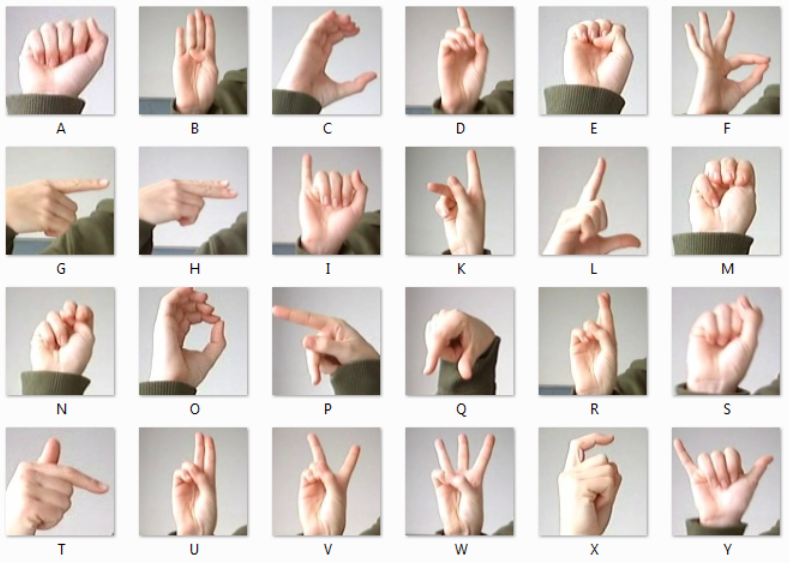







Build and train a neural network that achieves 80% classification accuracy for test-data.

Calculate the predictions for a random test-picture and draw a picture like below
(todennäköisyys = probability).




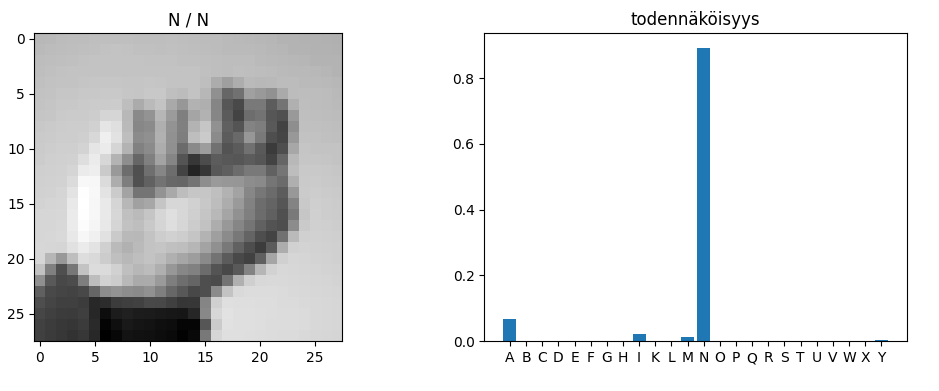

In [ ]:
#load sign_mnist_train.zip to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#unzip to colab
!unzip '/content/drive/MyDrive/sign_mnist.zip' -d '/content'

Archive:  /content/drive/MyDrive/sign_mnist.zip
   creating: /content/sign_mnist/
  inflating: /content/sign_mnist/sign_mnist_test.csv  
  inflating: /content/sign_mnist/sign_mnist_train.csv  


In [ ]:
#read to np.array
train_data=np.loadtxt('sign_mnist/sign_mnist_train.csv',delimiter=',',skiprows=1)
test_data=np.loadtxt('sign_mnist/sign_mnist_test.csv',delimiter=',',skiprows=1)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [ ]:
xtrain=train_data[:,1:]/255.0 #pixel values to 0...1
ytrain=train_data[:,0] #classes
xtest=test_data[:,1:]/255.0
ytest=test_data[:,0]
print(np.unique(ytrain))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


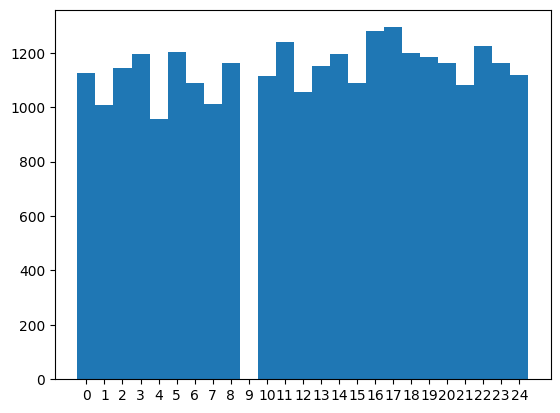

In [ ]:
#distribution of classes
plt.hist(ytrain,bins=np.arange(-0.5,25.5,1))
plt.xticks(np.arange(0,25,1))
plt.show()

In [ ]:
#class y=9 is missing (corresponds to J))
#decrease classes 10-24 by one
ytrain[ytrain>9]=ytrain[ytrain>9]-1
ytest[ytest>9]=ytest[ytest>9]-1

Y=['A','B','C','D','E','F','G','H','I','K','L','M',
   'N','O','P','Q','R','S','T','U','V','W','X','Y']

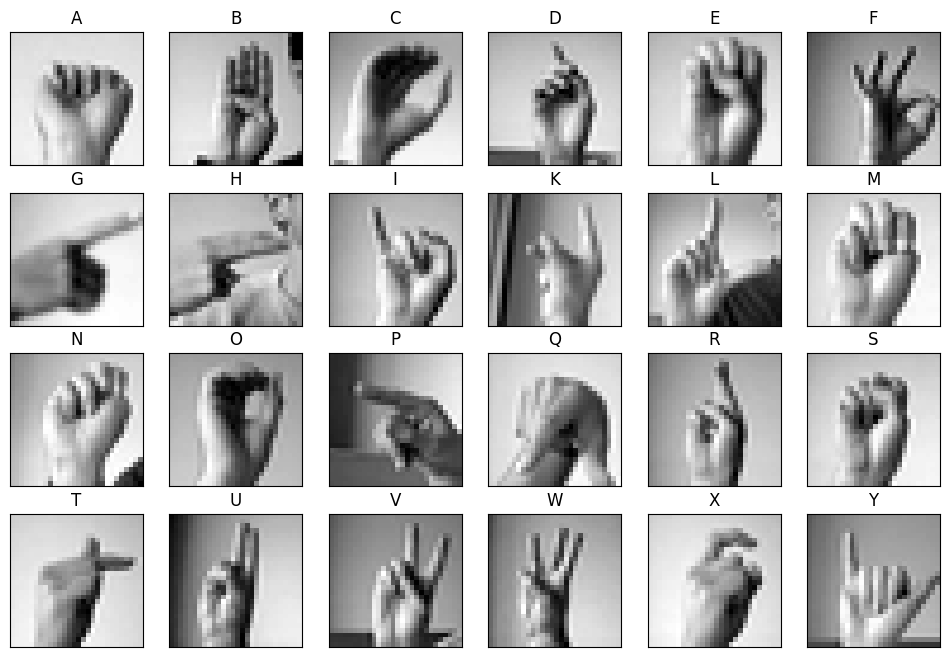

In [ ]:
#example pictures
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k,:]
    mk,nk=xtraink.shape
    indk=np.random.randint(mk)
    kuvak=xtraink[indk,:].reshape((28,28))
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

In [ ]:
#from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,672 (951.84 KB)

 Trainable params: 243,672 (951.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(xtrain, ytrain,
                  epochs=100,
                  batch_size=1000,
                  validation_data=(xtest,ytest))

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0686 - loss: 3.1604 - val_accuracy: 0.1364 - val_loss: 2.8739
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1751 - loss: 2.7294 - val_accuracy: 0.3233 - val_loss: 2.2317
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3065 - loss: 2.1627 - val_accuracy: 0.4725 - val_loss: 1.7954
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4056 - loss: 1.8248 - val_accuracy: 0.4730 - val_loss: 1.6571
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4853 - loss: 1.5822 - val_accuracy: 0.5360 - val_loss: 1.4757
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5366 - loss: 1.3994 - val_accuracy: 0.5658 - val_loss: 1.3296
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5892 - loss: 1.2468 - val_accuracy: 0.6148 - val_loss: 1.2140
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6309 - loss: 1.1089 - val_accuracy: 0.

In [ ]:
#save the model
model.save('/content/drive/MyDrive/sign_mnist_model.keras')

In [ ]:
#load a saved model
#from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/sign_mnist_model.keras')
model.summary()
model.evaluate(xtest,ytest)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,018 (2.79 MB)

 Trainable params: 243,672 (951.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,346 (1.86 MB)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8127 - loss: 0.9923


[0.9240669012069702, 0.8251533508300781]

In [ ]:
#testpoint number k
k=np.random.randint(7172)
xt=xtest[k]
yt=ytest[k]
at_pred=model.predict(xt.reshape((1,784))) #predicted probabilities, (1,10)-array
yt_pred=np.argmax(at_pred[0,:]) #predicted class
print(at_pred)
print(yt_pred)
print(Y[yt_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
[[1.26870433e-12 9.99965191e-01 5.88791405e-10 1.21201874e-05
  1.48617364e-05 7.50045319e-06 2.68434146e-12 3.91376791e-13
  9.36505700e-08 5.64040770e-09 6.65597474e-15 1.00626582e-11
  6.70566580e-09 4.91408888e-13 1.80200110e-14 3.96812086e-13
  7.72712948e-13 1.28305942e-07 6.85361992e-16 4.32075886e-09
  1.01668836e-13 2.76307794e-08 1.53234980e-09 5.91280747e-10]]
1
B


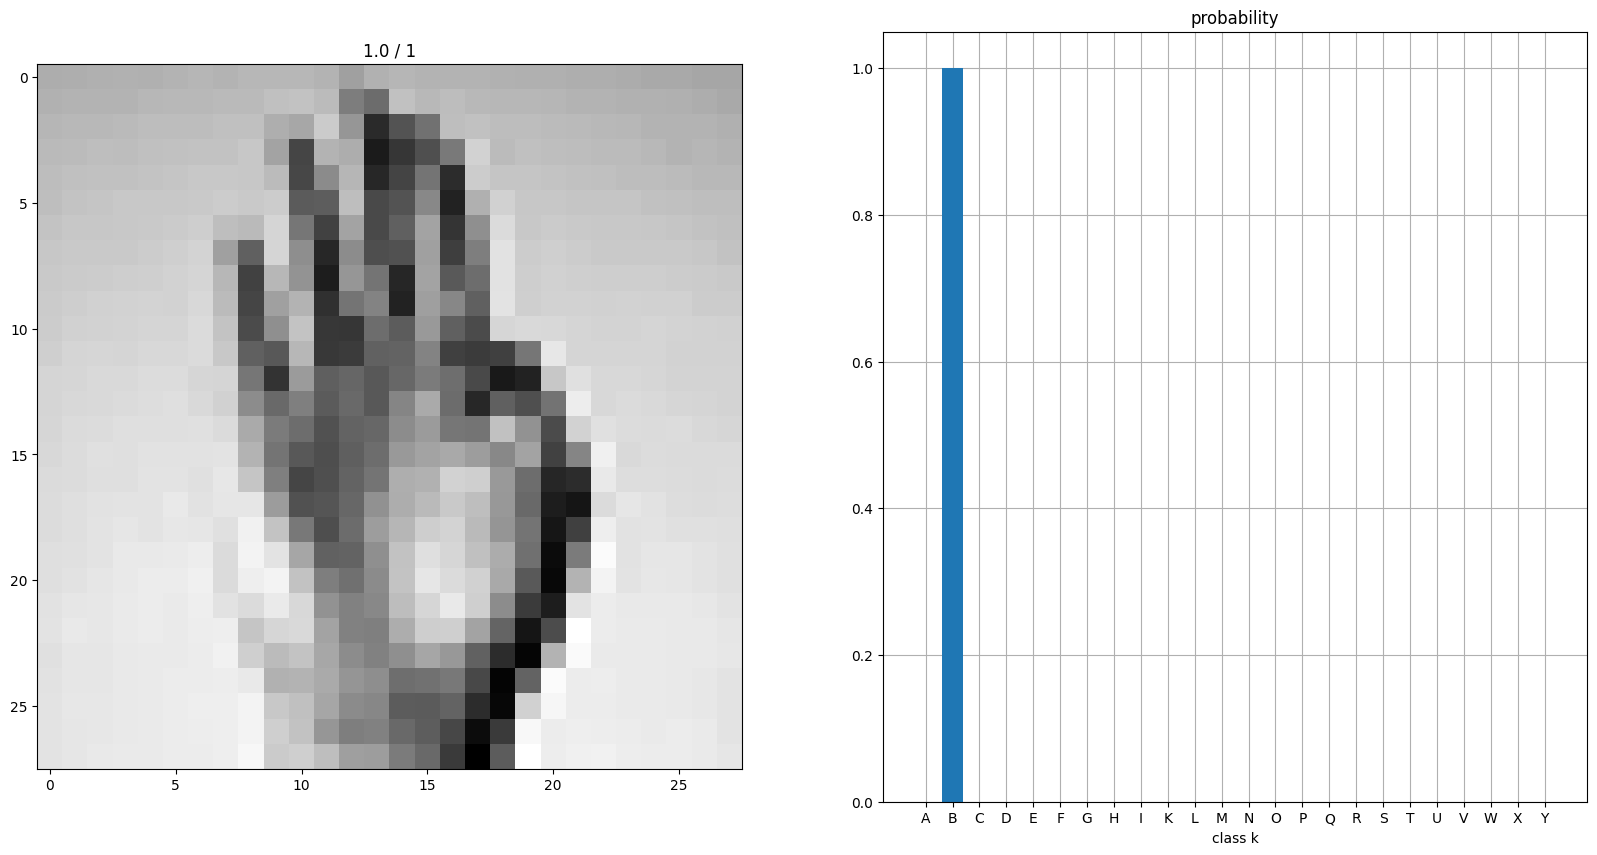

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((28,28)), cmap = 'gray')
plt.title(str(yt)+' / '+str(yt_pred))

plt.subplot(1,2,2)
plt.bar(np.linspace(0, 23,24), at_pred[0, :], zorder=2)
plt.xticks(np.linspace(0,23,24),Y)
plt.xlabel('class k')
plt.title('probability')
plt.grid()
plt.show()

##**EXERCISE 5**

In [2]:
#load ex6_data.csv to colab
df=pd.read_csv('ex6_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Data table set up

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
#remove column Market Category (contains only 8172 values)
df.drop(columns='Market Category',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [5]:
#remove rows with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Vehicle Size       11812 non-null  object 
 10  Vehicle Style      11812 non-null  object 
 11  highway MPG        11812 non-null  int64  
 12  city mpg           11812 non-null  int64  
 13  Popularity         11812 non-null  int64  
 14  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [6]:
m,n=df.shape
print(m)
print(n)

11812
15


#### Make

In [11]:
len(df['Make'].unique())

47

In [12]:
# Create the class mapping
class_mapping = {model: idx for idx, model in enumerate(df['Make'].unique())}

# Create a separate array with mapped values
XMake = np.array(df['Make'].map(class_mapping))

# Print the array
print(XMake)

len(np.unique(XMake))

[ 0  0  0 ... 35 35 30]


47

#### Model

In [9]:
len(df['Model'].unique())

904

In [10]:
# Create the class mapping
class_mapping = {model: idx for idx, model in enumerate(df['Model'].unique())}

# Create a separate array with mapped values
XModel = np.array(df['Model'].map(class_mapping))

# Print the array
print(XModel)

len(np.unique(XModel))

[  0   1   1 ... 902 902 903]


904

#### Engine Fuel type


In [13]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'electric', 'natural gas',
       'flex-fuel (premium unleaded required/E85)'], dtype=object)

In [14]:
# Convert class labels to numeric values
class_mapping = {
    'premium unleaded (required)': 0,
    'regular unleaded': 1,
    'premium unleaded (recommended)': 2,
    'flex-fuel (unleaded/E85)': 3,
    'diesel': 4,
    'flex-fuel (premium unleaded recommended/E85)':5,
    'electric': 6,
    'natural gas': 7,
    'flex-fuel (premium unleaded required/E85)': 8
}

# Apply mapping
Xfueltype = df['Engine Fuel Type'].map(class_mapping).values
print(Xfueltype)
np.unique(Xfueltype)

[0 0 0 ... 0 2 1]


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

#### Transmission type

In [15]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN',
       'DIRECT_DRIVE'], dtype=object)

In [16]:
# Convert class labels to numeric values
class_mapping = {
    'MANUAL': 0,
    'AUTOMATIC': 1,
    'AUTOMATED_MANUAL': 2,
    'UNKNOWN': 3,
    'DIRECT_DRIVE': 4
}

# Apply mapping
Xtranstype = df['Transmission Type'].map(class_mapping).values
print(Xtranstype)
np.unique(Xtranstype)

[0 0 0 ... 1 1 1]


array([0, 1, 2, 3, 4])

#### Driven wheels

In [17]:
df['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [18]:
# Convert class labels to numeric values
class_mapping = {
    'rear wheel drive': 0,
    'front wheel drive': 1,
    'all wheel drive': 2,
    'four wheel drive': 3
}

# Apply mapping
Xdrivewheel = df['Driven_Wheels'].map(class_mapping).values
print(Xdrivewheel)
np.unique(Xdrivewheel)

[0 0 0 ... 2 2 1]


array([0, 1, 2, 3])

#### Vehicle size

In [19]:
df['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [20]:
# Convert class labels to numeric values
class_mapping = {
    'Compact': 0,
    'Midsize': 1,
    'Large': 2
}

# Apply mapping
Xsize = df['Vehicle Size'].map(class_mapping).values
print(Xsize)
np.unique(Xsize)

[0 0 0 ... 1 1 1]


array([0, 1, 2])

#### Vehicle Style


In [21]:
df['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [22]:
# Convert class labels to numeric values
class_mapping = {
    'Coupe': 0,
    'Convertible': 1,
    'Sedan': 2,
    'Wagon': 3,
    '4dr Hatchback': 4,
    '2dr Hatchback': 5,
    '4dr SUV': 6,
    'Passenger Minivan': 7,
    'Cargo Minivan': 8,
    'Crew Cab Pickup': 9,
    'Regular Cab Pickup': 10,
    'Extended Cab Pickup': 11,
    '2dr SUV': 12,
    'Cargo Van': 13,
    'Convertible SUV': 14,
    'Passenger Van': 15
}

# Apply mapping
Xstyle = df['Vehicle Style'].map(class_mapping).values
print(Xstyle)
np.unique(Xstyle)

[0 1 0 ... 4 4 2]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

### Training

Use Models that have at least 10 representatives and datapoints whose MSRP  $\le$ 100000.

Split datapoints to training and test (70%/30%),
and build and train a neural network to predict the value  $y$ = MSRP using the other variables such that test mae is $\approx$ 3000.

Draw pictures like below

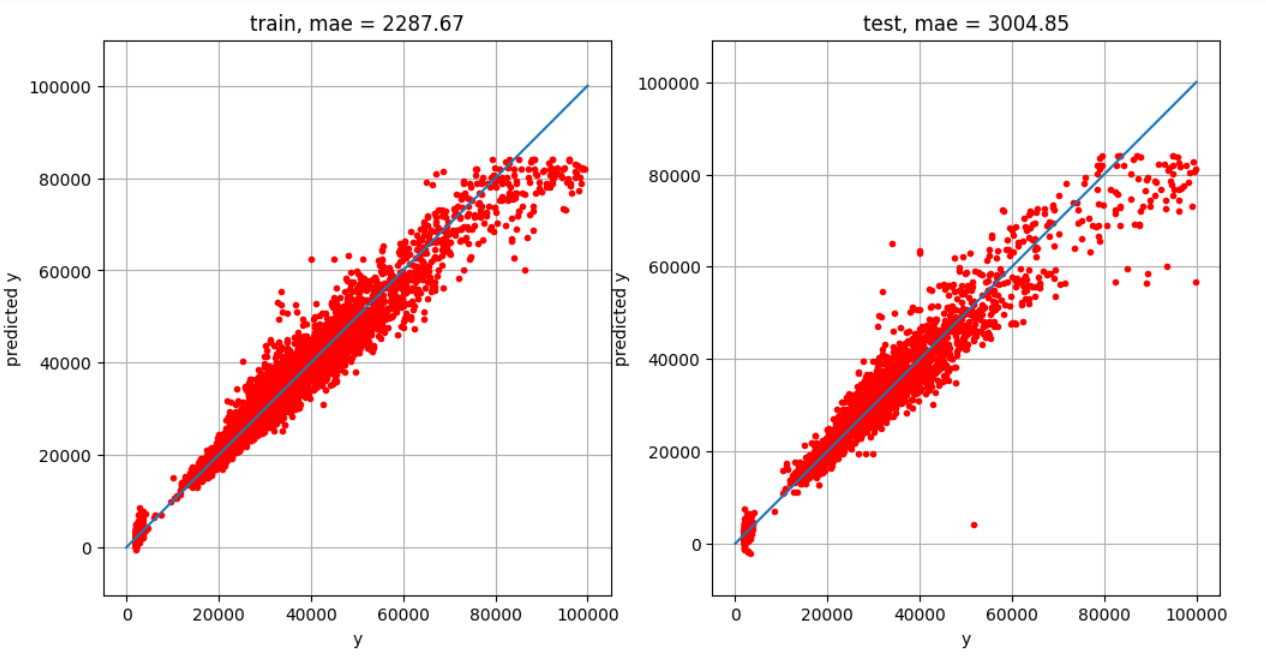

In [23]:
# Ensure column names are correct
X = np.column_stack((
    XMake,
    XModel,
    df['Year'],
    Xfueltype,
    df['Engine HP'],  # Check if the correct name is 'AspectRatio' in your dataset
    df['Engine Cylinders'],
    Xtranstype,
    Xdrivewheel,
    df['Number of Doors'],
    Xsize,
    Xstyle,
    df['highway MPG'],
    df['city mpg'],
    df['Popularity'],
))


# Apply mapping
y = df['MSRP']
# Print shapes and unique values
print(y.shape)   # Should match the number of rows in X
print(X.shape)   # Should be (rows, 16)


(11812,)
(11812, 14)


In [24]:
#drop the rare (high) prices
print(y.shape)
print(y[y>100000].shape)

(11812,)
(633,)


In [25]:
X=X[y<=100000,:]
y=y[y<=100000]

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [27]:
mu=np.mean(Xtrain,axis=0)
s=np.std(Xtrain,axis=0)
print(mu)
print(s)
Xtrain_hat = (Xtrain - mu) / s  # Normalize training data
Xtest_hat = (Xtest - mu) / s    # Normalize test data using train stats

[2.04484345e+01 4.60738658e+02 2.01016856e+03 1.23565495e+00
 2.33724217e+02 5.43322684e+00 7.95143770e-01 1.15833866e+00
 3.47424920e+00 8.23258786e-01 4.79795527e+00 2.66651757e+01
 1.97001917e+01 1.57663463e+03]
[1.13313805e+01 2.66739391e+02 7.74189603e+00 9.01220491e-01
 8.88213506e+01 1.46041970e+00 5.22052409e-01 9.52469023e-01
 8.59233719e-01 7.71419744e-01 3.51816041e+00 6.82121067e+00
 6.64434372e+00 1.45781297e+03]


In [28]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(7825, 14)
(7825,)
(3354, 14)
(3354,)


In [36]:
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Input, Dropout, Dense

model = Sequential()
model.add(Input(shape=(14,)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 614,145 (2.34 MB)

 Trainable params: 614,145 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.api.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), #0.001 is the default learning rate for Adam
              loss='mae')

In [38]:
history=model.fit(Xtrain_hat,ytrain,
                  epochs=100,
                  batch_size=128,
                  validation_data=(Xtest_hat,ytest)
                  )
#first 300 epochs with learning rate 0.1, then 200 epochs with learning rate 0.01, then 100 epochs with learning arte 0.001

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 18477.2637 - val_loss: 6362.1621
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7044.8936 - val_loss: 5922.1484
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7082.4985 - val_loss: 5979.5464
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6778.1909 - val_loss: 5703.3311
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 6654.9390 - val_loss: 6902.8945
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6973.0464 - val_loss: 5101.9370
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6383.5093 - val_loss: 5047.8281
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6202.2319 - val_loss: 5053.5879
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5994.0396 - val_loss: 4807.9321
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5900.7827 - val_loss: 4850.4111
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5736.4517 - val_l

In [39]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
#save the model
model.save('/content/drive/MyDrive/cars_model.keras')

In [41]:
#load a saved model
from tensorflow import keras
from keras.api.models import load_model
model=load_model('/content/drive/MyDrive/cars_model.keras')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,842,437 (7.03 MB)

 Trainable params: 614,145 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,228,292 (4.69 MB)

In [42]:
#predicted values for y
ytrain_pred=model.predict(Xtrain_hat)
print(ytrain_pred.shape)
ytest_pred=model.predict(Xtest_hat)
print(ytest_pred.shape)

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(7825, 1)
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(3354, 1)


**Mean absolute error (mae):**

$$\displaystyle{C=\frac{1}{m}\, \sum_{i=1}^m |y^{(i)}-y^{(i)}_{pred}|}$$

In [65]:
# Ensure both are NumPy arrays (if they are pandas Series)
ytrain = np.array(ytrain)
ytrain_pred = np.array(ytrain_pred)

mae_train = 0
for m in range(len(ytrain)): #m
    mae_train += abs(ytrain[m] - ytrain_pred[m])

mae_train = mae_train/len(ytrain)  # multiply by  1/m

# Now, format the output as a scalar
print(f'Train MAE: {mae_train}')


Train MAE: [2850.381]


In [68]:
# Ensure both are NumPy arrays (if they are pandas Series)
ytest = np.array(ytest)
ytest_pred = np.array(ytest_pred)

mae_test = 0
for m in range(len(ytest)):  # Iterate over all test samples
    mae_test += abs(ytest[m] - ytest_pred[m])  # Calculate the absolute error

mae_test = mae_test / len(ytest)  # Divide by the number of samples to get the average (MAE)

# Now, format the output as a scalar
print(f'Test MAE: {mae_test}')


Test MAE: [3236.301]


In [50]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(ytrain, ytrain_pred)
mae_test = mean_absolute_error(ytest, ytest_pred)
print(f'Train MAE: {mae_train:.2f}')
print(f'Test MAE: {mae_test:.2f}')

Train MAE: 2850.38
Test MAE: 3236.30


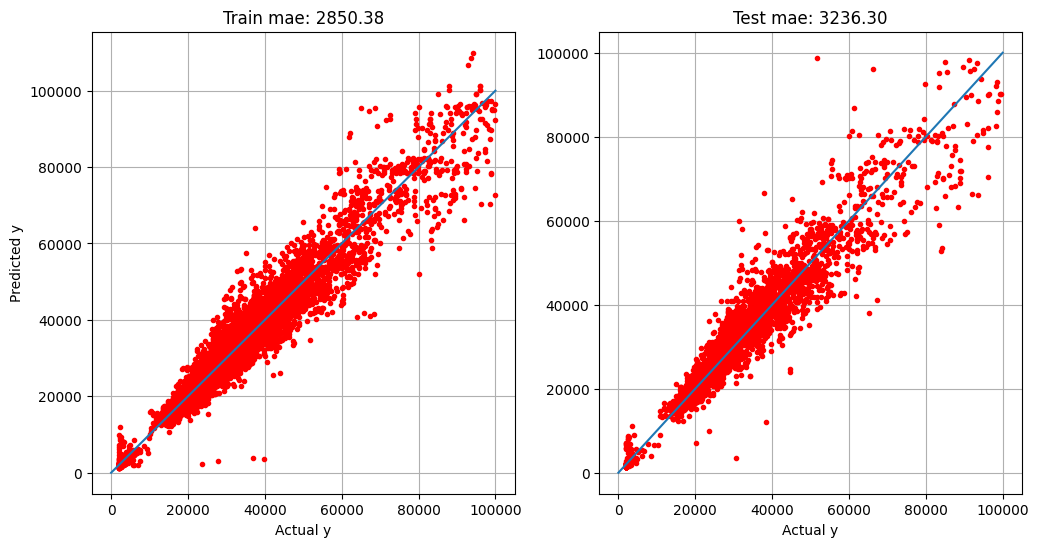

In [53]:
plt.figure(figsize=(12, 6))

# Train Set Plot
plt.subplot(1, 2, 1)
plt.plot(ytrain, ytrain_pred, 'r.')  # No need for [:,0] if 1D
plt.plot([0, 100000], [0, 100000])  # Black dashed line for reference
plt.title(f'Train mae: {mae_train:.2f}')
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

# Test Set Plot
plt.subplot(1, 2, 2)
plt.plot(ytest, ytest_pred, 'r.')
plt.plot([0, 100000], [0, 100000])  # Reference line
plt.title(f'Test mae: {mae_test:.2f}')
plt.grid()
plt.xlabel('Actual y')

plt.show()